In [26]:
# !pip install requests
# !pip install scikit-learn

### Step 1 - Get movie data through APIs 

In [132]:
import requests

api_key = 'fab066ce'

movie_title = 'Inception'

# API endpoint
url = f'http://www.omdbapi.com/?t={movie_title}&apikey={api_key}'

# Send GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    
    # Print the movie details
    print("Movie Title:", data.get('Title'))
    print("Year:", data.get('Year'))
    print("Genre:", data.get('Genre'))
    print("Director:", data.get('Director'))
    print("Plot:", data.get('Plot'))
    print("IMDB Rating:", data.get('imdbRating'))
else:
    print("Failed to retrieve data:", response.status_code)

Movie Title: Inception
Year: 2010
Genre: Action, Adventure, Sci-Fi
Director: Christopher Nolan
Plot: A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O., but his tragic past may doom the project and his team to disaster.
IMDB Rating: 8.8


In [133]:
import csv

movie_titles = [
    'Inception', 'The Dark Knight', 'Interstellar', 'The Matrix', 'Titanic',
    'Avatar', 'The Godfather', 'Pulp Fiction', 'The Shawshank Redemption', 'The Lion King',
    'The Godfather Part II', 'The Dark Knight Rises', 'Forrest Gump', 'The Empire Strikes Back', 
    'The Silence of the Lambs', 'Schindler\'s List', 'Fight Club', 'The Lord of the Rings: The Return of the King',
    'The Prestige', 'The Departed', 'Gladiator', 'The Green Mile', 'The Usual Suspects', 
    'Goodfellas', 'The Intouchables', 'Se7en', 'Whiplash', 'The Avengers', 'The Truman Show',
    'Jaws', 'The Lion King', 'The Matrix Reloaded', 'Jurassic Park', 'Star Wars: A New Hope',
    'Casablanca', 'Back to the Future', 'The Social Network', 'A Beautiful Mind', 'The Big Lebowski',
    'Braveheart', 'Gone with the Wind', 'Citizen Kane', 'The Wizard of Oz', 'The Grand Budapest Hotel',
    'The Revenant', 'Mad Max: Fury Road', 'The Incredibles', 'The Wolf of Wall Street', 'Spider-Man: No Way Home'
]

# Open a CSV file to store the data
with open('movies_data.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Year', 'Genre', 'Director', 'Plot', 'IMDB Rating'])  # Column headers

    # Loop through the movie titles and fetch data
    for title in movie_titles:
        url = f'http://www.omdbapi.com/?t={title}&apikey={api_key}'
        response = requests.get(url)
        data = response.json()

        # Write the movie data to the CSV file
        writer.writerow([
            data.get('Title'),
            data.get('Year'),
            data.get('Genre'),
            data.get('Director'),
            data.get('Plot'),
            data.get('imdbRating')
        ])

print("Data has been written to 'movies_data.csv'")


Data has been written to 'movies_data.csv'


### Step 2: data preprocessing 

In [134]:
import pandas as pd

df = pd.read_csv('movies_data.csv')


In [135]:
df

,Title,Year,Genre,Director,Plot,IMDB Rating
0,Inception,2010,"Action, Adventure, Sci-Fi",Christopher Nolan,A thief who steals corporate secrets through t...,8.8
1,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,When a menace known as the Joker wreaks havoc ...,9.0
2,Interstellar,2014,"Adventure, Drama, Sci-Fi",Christopher Nolan,When Earth becomes uninhabitable in the future...,8.7
3,The Matrix,1999,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski",When a beautiful stranger leads computer hacke...,8.7
4,Titanic,1997,"Drama, Romance",James Cameron,A seventeen-year-old aristocrat falls in love ...,7.9
5,Avatar,2009,"Action, Adventure, Fantasy",James Cameron,A paraplegic Marine dispatched to the moon Pan...,7.9
6,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,The aging patriarch of an organized crime dyna...,9.2
7,Pulp Fiction,1994,"Crime, Drama",Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",8.9
8,The Shawshank Redemption,1994,Drama,Frank Darabont,A banker convicted of uxoricide forms a friend...,9.3
9,The Lion King,1994,"Animation, Adventure, Drama","Roger Allers, Rob Minkoff",Lion prince Simba and his father are targeted ...,8.5


In [136]:
from sklearn.preprocessing import MinMaxScaler
import re

#handle missing values
df['Genre'] = df['Genre'].fillna('N/A')
df['Director'] = df['Director'].fillna('N/A')
df['Plot'] = df['Plot'].fillna('N/A')
# df['IMDB Rating'] = df['IMDB Rating'].fillna('N/A')
# Replace NaN in 'IMDB Rating' column with a placeholder (e.g., 'Unknown' or 0)
df['IMDB Rating'] = df['IMDB Rating'].fillna(0)


df.head(40)

,Title,Year,Genre,Director,Plot,IMDB Rating
0,Inception,2010,"Action, Adventure, Sci-Fi",Christopher Nolan,A thief who steals corporate secrets through t...,8.8
1,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,When a menace known as the Joker wreaks havoc ...,9.0
2,Interstellar,2014,"Adventure, Drama, Sci-Fi",Christopher Nolan,When Earth becomes uninhabitable in the future...,8.7
3,The Matrix,1999,"Action, Sci-Fi","Lana Wachowski, Lilly Wachowski",When a beautiful stranger leads computer hacke...,8.7
4,Titanic,1997,"Drama, Romance",James Cameron,A seventeen-year-old aristocrat falls in love ...,7.9
5,Avatar,2009,"Action, Adventure, Fantasy",James Cameron,A paraplegic Marine dispatched to the moon Pan...,7.9
6,The Godfather,1972,"Crime, Drama",Francis Ford Coppola,The aging patriarch of an organized crime dyna...,9.2
7,Pulp Fiction,1994,"Crime, Drama",Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",8.9
8,The Shawshank Redemption,1994,Drama,Frank Darabont,A banker convicted of uxoricide forms a friend...,9.3
9,The Lion King,1994,"Animation, Adventure, Drama","Roger Allers, Rob Minkoff",Lion prince Simba and his father are targeted ...,8.5


In [137]:
#normalize IMDB ratings
scaler = MinMaxScaler(feature_range = (0,1))
df['Normalized IMDB Rating']= scaler.fit_transform(df[['IMDB Rating']])

df.head(2)

,Title,Year,Genre,Director,Plot,IMDB Rating,Normalized IMDB Rating
0,Inception,2010,"Action, Adventure, Sci-Fi",Christopher Nolan,A thief who steals corporate secrets through t...,8.8,0.946237
1,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,When a menace known as the Joker wreaks havoc ...,9.0,0.967742


In [138]:
# Test processing for plot 
def preprocess_text(text):
    text = re.sub(r'\s+', ' ', text) #remove extra space
    text = re.sub(r'[^\w\s]', '', text) #remove punctuation
    text = text.lower() # convert text to lowercase
    return text

df['Processed Plot'] = df['Plot'].apply(preprocess_text)

In [139]:
print("\n Cleaned data")

df.head(2)


 Cleaned data


,Title,Year,Genre,Director,Plot,IMDB Rating,Normalized IMDB Rating,Processed Plot
0,Inception,2010,"Action, Adventure, Sci-Fi",Christopher Nolan,A thief who steals corporate secrets through t...,8.8,0.946237,a thief who steals corporate secrets through t...
1,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,When a menace known as the Joker wreaks havoc ...,9.0,0.967742,when a menace known as the joker wreaks havoc ...


In [140]:
df.shape

(49, 8)

In [141]:
df.columns

Index(['Title', 'Year', 'Genre', 'Director', 'Plot', 'IMDB Rating',
       'Normalized IMDB Rating', 'Processed Plot'],
      dtype='object')

### Step 3 : Exploratory Data Analysis

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
#descriptive statistics
print("Descriptive statistics")
print(df[['Year', 'IMDB Rating']].describe())

Descriptive statistics
              Year  IMDB Rating
count    49.000000    49.000000
mean   1995.510204     8.263265
std      20.141295     1.269300
min    1939.000000     0.000000
25%    1993.000000     8.100000
50%    1999.000000     8.500000
75%    2010.000000     8.700000
max    2021.000000     9.300000


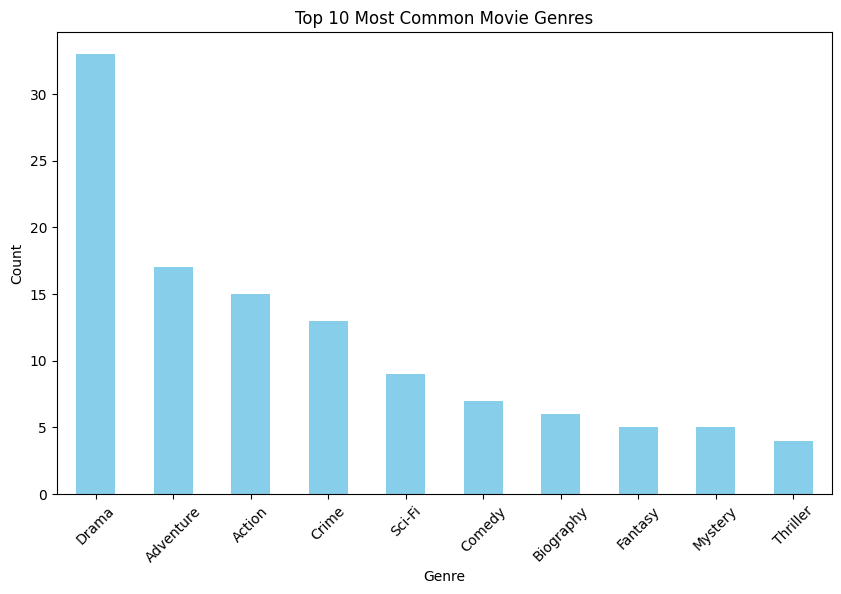

In [144]:
#data visualization 
genre_counts = df['Genre'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

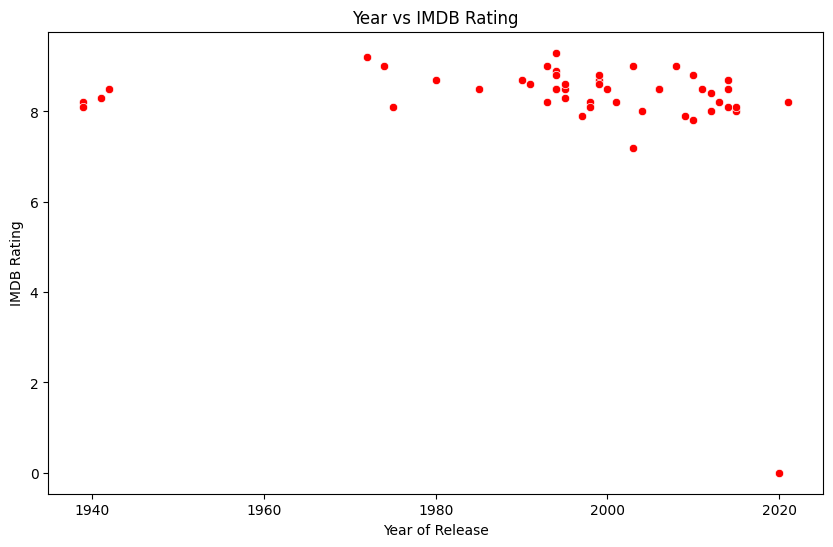

In [145]:
# Scatter plot of Year vs IMDB Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='IMDB Rating', data=df, color='red')
plt.title('Year vs IMDB Rating')
plt.xlabel('Year of Release')
plt.ylabel('IMDB Rating')
plt.show()

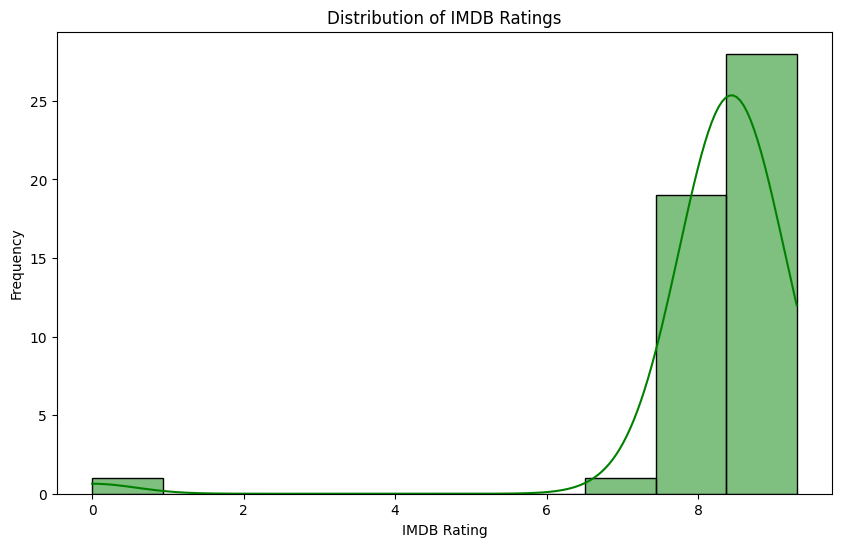

In [146]:
# Histogram for IMDB Ratings distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB Rating'], bins=10, kde=True, color='green')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

In [147]:
# 3. Correlation Analysis
# Checking correlation between Year and IMDB Rating
correlation = df[['Year', 'IMDB Rating']].corr()
print("\nCorrelation between Year and IMDB Rating:")
correlation


Correlation between Year and IMDB Rating:


,Year,IMDB Rating
Year,1.000000,-0.202245
IMDB Rating,-0.202245,1.000000


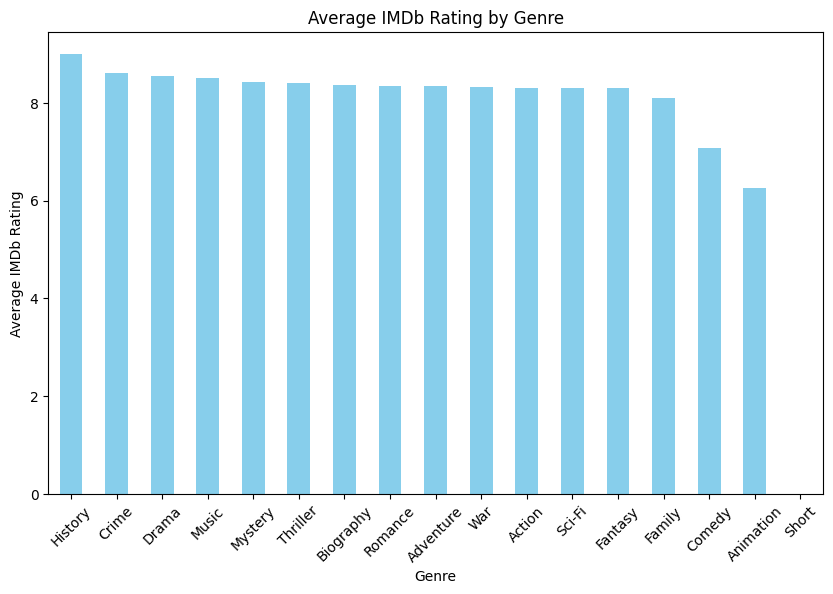

In [148]:

# Split the genres and create new rows for each genre
df_exploded = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')
df_exploded['Genre'] = df_exploded['Genre'].str.strip()

# Group by genre and calculate the average IMDb rating
genre_avg_rating = df_exploded.groupby('Genre')['IMDB Rating'].mean()

# Plot the average IMDb rating by genre
plt.figure(figsize=(10, 6))
genre_avg_rating.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average IMDb Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average IMDb Rating')
plt.xticks(rotation=45)
plt.show()

### Step 4 : Sentiment analysis

In [149]:
#additional preprocessing - Tokenisation, Remove stopwords, lemmatization/stemming
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download resources if not already available
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Example preprocessing function
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

# Apply to your "processed plot" column
df['Processed Plot'] = df['Processed Plot'].apply(preprocess_text)

In [150]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon', quiet=True)
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER to the processed plot column
df['sentiment_score'] = df['Processed Plot'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment as Positive, Neutral, Negative
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


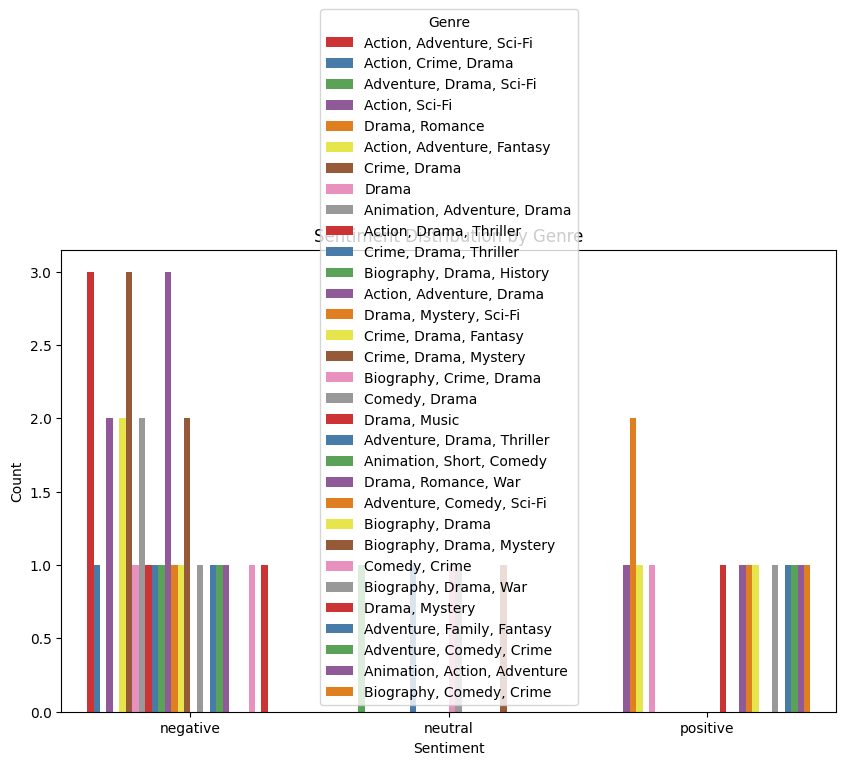

In [151]:
#visualize sentiment distribution by genre

# Plot sentiment distribution by Genre
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment_label', hue='Genre', palette='Set1')
plt.title('Sentiment Distribution by Genre')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

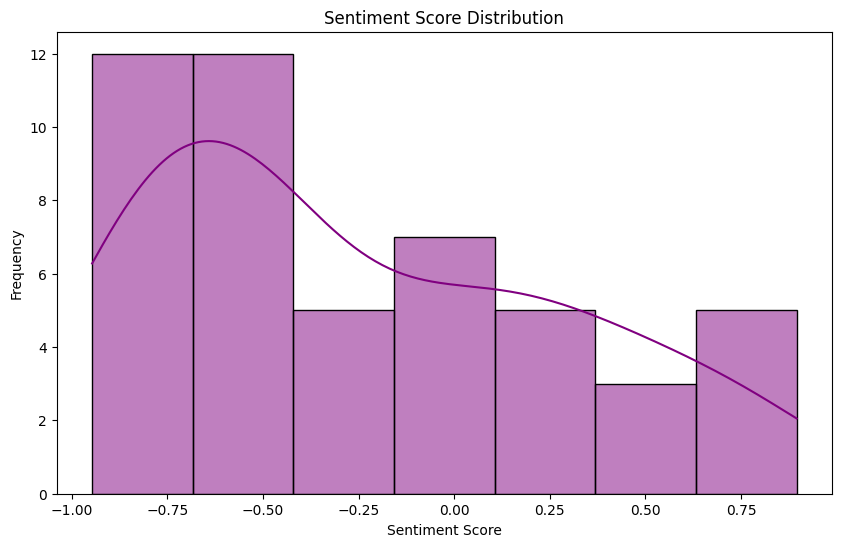

In [152]:
#sentiment score distribution 
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], kde=True, color='purple')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


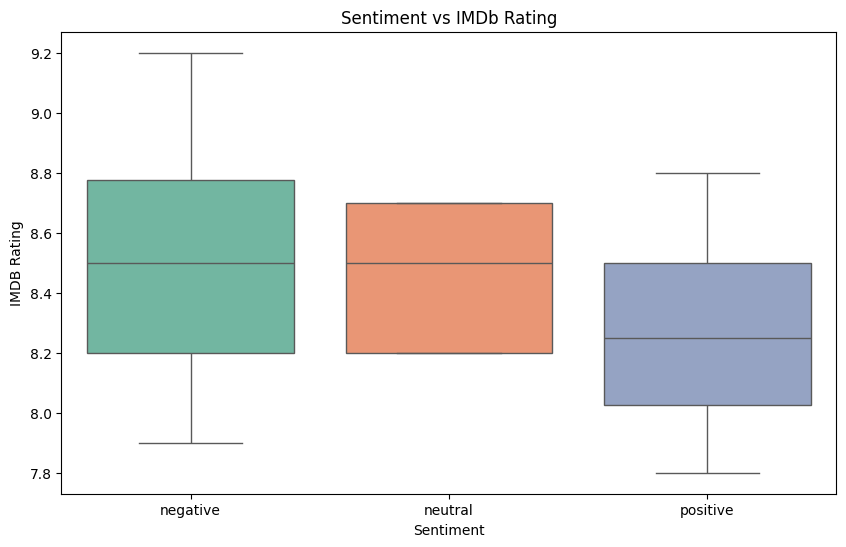

In [153]:
#sentiment vs imdb 
# Sentiment vs IMDb Rating with explicit hue (no need to manually add legend)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sentiment_label', y='IMDB Rating', hue='sentiment_label', palette='Set2', showfliers=False)
plt.title('Sentiment vs IMDb Rating')
plt.xlabel('Sentiment')
plt.ylabel('IMDB Rating')
plt.show()


In [154]:
print(df['sentiment_label'].value_counts())


sentiment_label
negative    30
positive    14
neutral      5
Name: count, dtype: int64


<Axes: xlabel='sentiment_label', ylabel='IMDB Rating'>

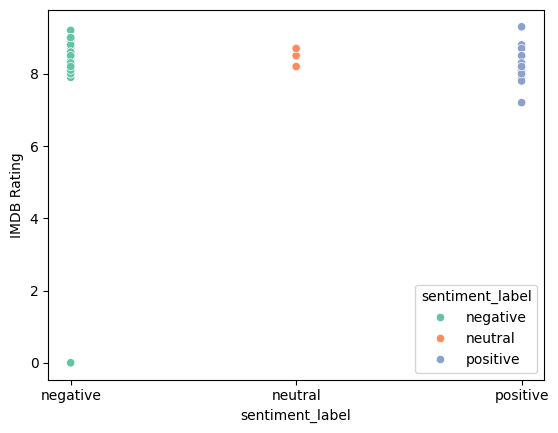

In [155]:
sns.scatterplot(data=df, x='sentiment_label', y='IMDB Rating', hue='sentiment_label', palette='Set2')

In [158]:
df.head(2)

,Title,Year,Genre,Director,Plot,IMDB Rating,Normalized IMDB Rating,Processed Plot,sentiment_score,sentiment_label
0,Inception,2010,"Action, Adventure, Sci-Fi",Christopher Nolan,a thief who steals corporate secrets through t...,8.8,0.946237,thief steal corporate secret use dreamsharing ...,-0.9468,negative
1,The Dark Knight,2008,"Action, Crime, Drama",Christopher Nolan,when a menace known as the joker wreaks havoc ...,9.0,0.967742,menace known joker wreaks havoc chaos people g...,-0.9217,negative


In [160]:
# Strip whitespace and convert both strings to lowercase
specific_plot = "A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O., but his tragic past may doom the project and his team to disaster."
specific_plot = specific_plot.strip().lower()
df['Plot'] = df['Plot'].str.strip().str.lower()

# Then search again
matching_movie = df[df['Plot'].str.contains(specific_plot, na=False)]
matching_movie[['Title', 'Plot', 'sentiment_label']]


,Title,Plot,sentiment_label
0,Inception,a thief who steals corporate secrets through t...,negative
